In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
#Importing data
#Column names: Time (s), Temperature (C),Temperature Error (C), DAC Voltage (%)

part1_max = np.loadtxt('data/4.1-max_temp.csv', delimiter=',', skiprows=1)
part1_min = np.loadtxt('data/4.1-min_temp.csv', delimiter=',', skiprows=1)

part1_alter = np.loadtxt('data/4.1-reaching5.csv', delimiter=',', skiprows=1)


#Varying Band Parameters csv
part2_band = np.loadtxt('data/4.2-modifying_band.csv', delimiter=',', skiprows=1)
#(-4095, 0) redesign of heating block
part2_osc1 = np.loadtxt('data/4.2-oscillation-1.csv', delimiter=',', skiprows=1)
#(-4095, 4095) redesign of heating block
part2_osc2 = np.loadtxt('data/4.2-oscillation-2.csv', delimiter=',', skiprows=1)


# 4.1: Open Loop Control

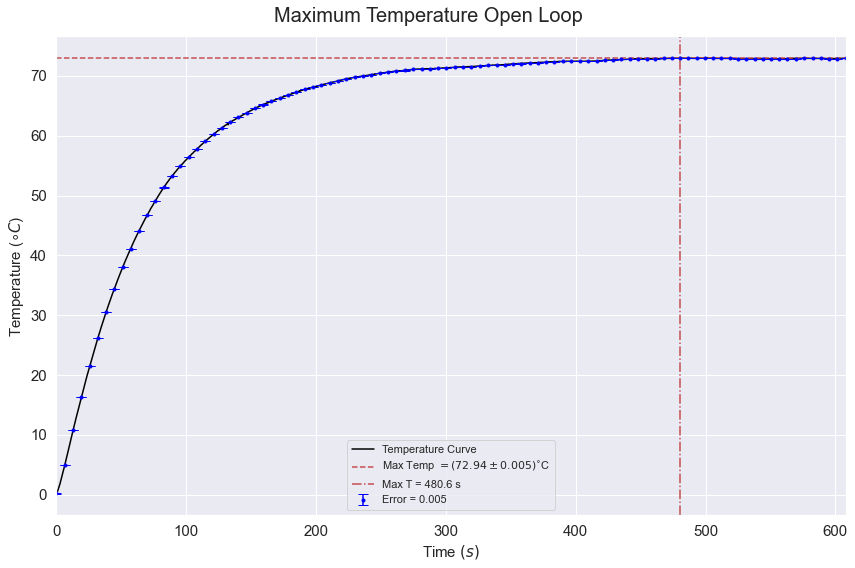

In [3]:
#Maxmimum Temperature Plot
plt.figure(figsize = (12,8))

#Offsetting Data to begin at 0
min_x = np.min(part1_max[:,0])
max_x = np.max(part1_max[:,0]) - min_x

#Plotting Data
plt.plot(part1_max[:,0] - min_x, part1_max[:,1], color = "black", label = "Temperature Curve") #temp

#Finding Maximum Temperature and Corresponding Time Value
max_temp = max(part1_max[:,1])
corr_x = part1_max[:,0][part1_max[:,1].argmax()]
corr_x2 = (corr_x - min_x)

#For Error Bars, only plotting every 25th point (easier visualization)
x_data = part1_max[::25, 0] - min_x
y_data = part1_max[::25, 1]

#Plot specifications
plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Maximum Temperature Open Loop", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlim(0, max_x)
plt.axhline(max_temp, color='r', linestyle='--', label=r"Max Temp $ = (72.94 \pm 0.005)^{\circ}$C")
plt.axvline(corr_x2, color='r', linestyle='-.', label = r"Max T = 480.6 s")
plt.errorbar(x_data, y_data, yerr=0.005, fmt='o', color = "blue", markersize=3, capsize=5, label = "Error = 0.005")
plt.tight_layout()
plt.legend(loc = "best")
plt.show()

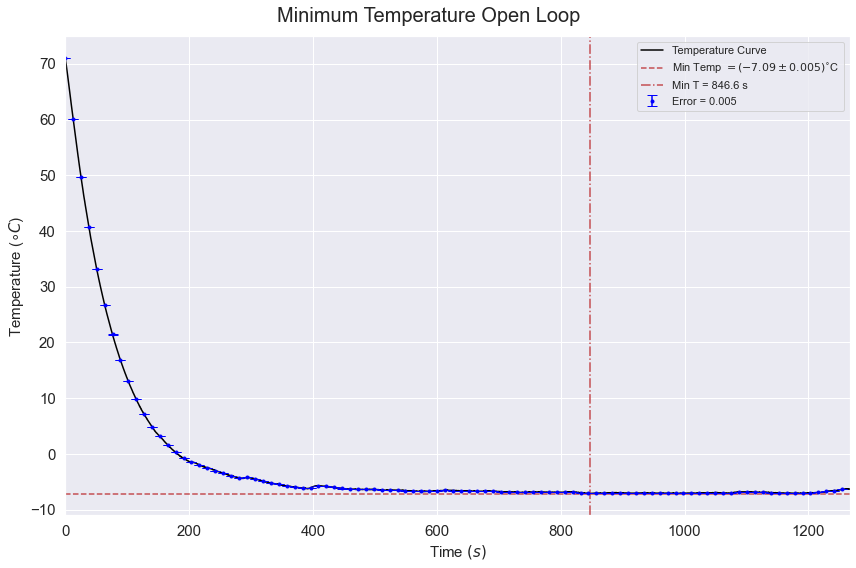

In [4]:
#Minimum Temperature Plot
plt.figure(figsize = (12,8))

#Offsetting Data to begin at 0
min_x = np.min(part1_min[:,0])
max_x = np.max(part1_min[:,0]) - min_x

#Plotting Data
plt.plot(part1_min[:,0] - min_x, part1_min[:,1], color = "black", label = "Temperature Curve") #temp

#Finding Maximum Temperature and Corresponding Time
min_temp = min(part1_min[:,1])
corr_x = part1_min[:,0][part1_min[:,1].argmin()]
corr_x2 = (corr_x - min_x)

#For Error Bars, only plotting every 50th point (easier visualization)
#More spacing in this instance because many more points were taken
x_data = part1_min[::50, 0] - min_x
y_data = part1_min[::50, 1]

#Plot specifications
plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Minimum Temperature Open Loop", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.axhline(min_temp, color='r', linestyle='--', label=r"Min Temp $ = (-7.09 \pm 0.005)^{\circ}$C")
plt.axvline(corr_x2, color='r', linestyle='-.', label = r"Min T = 846.6 s ")
plt.errorbar(x_data, y_data, yerr=0.005, fmt='o', color = "blue", markersize=3, capsize=5, label = "Error = 0.005")
plt.xlim(0, max_x)
plt.tight_layout()
plt.legend(loc="best")
plt.show()

In [5]:
#LOOKING AT DATA WE SEE THAT IT STABILISES AT 8146, no need to have data past 8175 since I was
#just trying to get better results
DAC_voltages_prime = part1_alter[:8175,3]

print('[Temperature, DAC]: ', [part1_alter[8146,1] , DAC_voltages_prime[8146]])
print('[Temperature, Voltage (V)]: ', [part1_alter[8146,1] , DAC_voltages_prime[8146]*5/100])

[Temperature, DAC]:  [-5.016, -51.4041514]
[Temperature, Voltage (V)]:  [-5.016, -2.57020757]


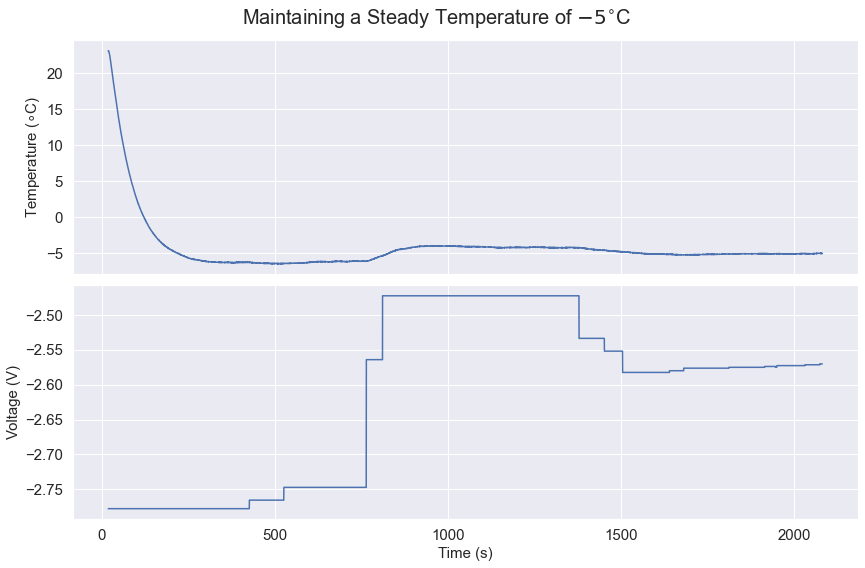

In [6]:
fig, axs = plt.subplots(2, figsize=(12, 8), sharex=True)

#First Figure Plot Specifications
axs[0].plot(part1_alter[72:8146,0], part1_alter[72:8146,1])
axs[0].set_ylabel("Temperature ($\circ$C)", size = 15)
axs[0].tick_params(axis='y', labelsize=15)

#Second Figure Plot Specifications
axs[1].plot(part1_alter[72:8146,0], part1_alter[72:8146,3]*5 / 100)
axs[1].set_ylabel("Voltage (V)", size = 15)
axs[1].tick_params(axis='x', labelsize=15)
axs[1].tick_params(axis='y', labelsize=15)


plt.suptitle(r"Maintaining a Steady Temperature of $-5^{\circ}$C", size = 20)
plt.xlabel("Time (s)", size = 15)
plt.tight_layout()
plt.show()

# 4.2: On-Off Control

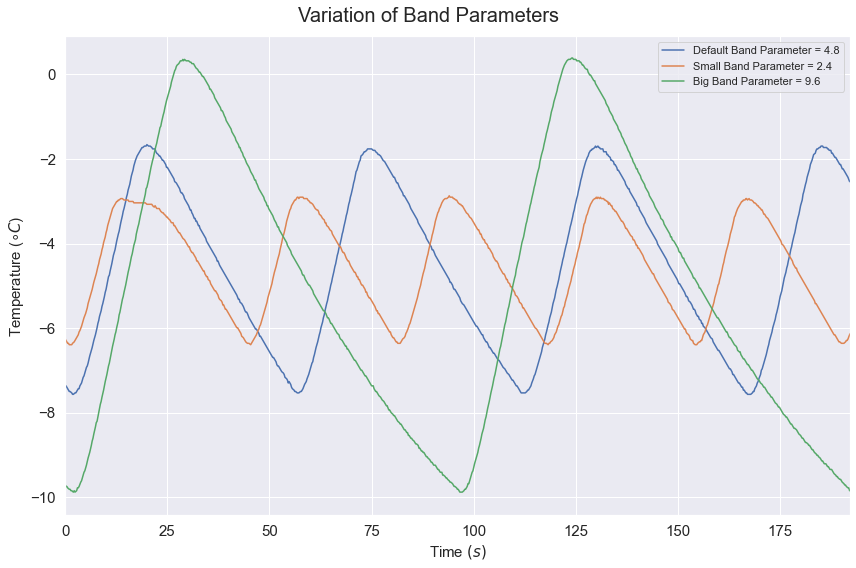

In [7]:
#Varying Band Parameter Plot
plt.figure(figsize = (12,8))

#Truncating Data to Fit on the Same Plot
#First Band Parameter = 4.8
default_band = part2_band[775:1855]
small_band = part2_band[2465:3220]
big_band = part2_band[3460:]

#Offsetting Data
min_x = np.min(default_band[:,0])
min_x2 = np.min(small_band[:,0])
min_x3 = np.min(big_band[:,0])

#Plotting Band Variation
#plt.plot(part2_band[:,0] - min_x, part2_band[:,1])
plt.plot(default_band[:,0] - min_x, default_band[:,1], label = "Default Band Parameter = 4.8")
plt.plot(small_band[:,0] - min_x2, small_band[:,1], label = "Small Band Parameter = 2.4")
plt.plot(big_band[:,0] - min_x3, big_band[:,1], label = "Big Band Parameter = 9.6")

#Plot Specifications
plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.xlim([0,192])
plt.suptitle("Variation of Band Parameters", size = 20)
plt.legend(loc="best")
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.show()

In [8]:
#Extract the time and temperature data for big_band
big_time = big_band[:,0] - min_x3
big_temp = big_band[:,1]

#Find the peaks in the temperature data using find_peaks()
from scipy.signal import find_peaks
big_peaks, _ = find_peaks(big_temp, prominence=5)

#Calculate the period of the oscillation
half_period = np.mean(np.diff(big_time[big_peaks]))
half_error = np.std(np.diff(big_time[big_peaks]))/ np.sqrt(len(big_peaks))
big_period = 2 * half_period
big_error = 2 * half_error

#Calculate the amplitude of the oscillation
big_amplitude = np.abs(np.max(big_temp) - np.min(big_temp))

#Period with Error
print("Period of oscillation in big_band:", big_period, 'with', big_error, "s")

Period of oscillation in big_band: 95.2666666666667 with 35.554322399250424 s


In [9]:
#Define a window size to search for max and min values around each peak
window_size = 100

#Calculate the amplitudes of all peaks in big_band
big_amplitudes = []
for i in big_peaks:
    #Find the maximum and minimum temperature values around each peak
    temp_window = big_temp[i-window_size:i+window_size+1]
    peak_max = np.max(temp_window)
    peak_min = np.min(temp_window)
    #Calculate the amplitude of the peak
    peak_amplitude = np.abs(peak_max - peak_min)
    big_amplitudes.append(peak_amplitude)
    
#Print the amplitudes of all peaks in big_band
big_amplitude = np.mean(big_amplitudes)
big_error = np.std(big_amplitudes)

#Amplitude with Error
print("Amplitude of oscillation in big_band:", big_amplitude ,'with', big_error, "\N{DEGREE SIGN}C")


Amplitude of oscillation in big_band: 10.069857142857144 with 0.1008144385512722 °C


In [10]:
#Extract the time and temperature data for small_band
small_time = small_band[:,0] - min_x2
small_temp = small_band[:,1]

#Find the peaks in the temperature data using find_peaks()
from scipy.signal import find_peaks
small_peaks, _ = find_peaks(small_temp, prominence=1)

#Calculate the period of the oscillation
half_period = np.mean(np.diff(small_time[small_peaks]))
half_error = np.std(np.diff(small_time[small_peaks]))/ np.sqrt(len(small_peaks))
small_period = 2 * half_period
small_error = 2*half_error

#Calculate the amplitude of the oscillation
small_amplitude = np.abs(np.max(small_temp) - np.min(small_temp))

#Period with Error
print("Period of oscillation in small_band:", small_period, 'with', small_error, "s")

Period of oscillation in small_band: 38.400000000000006 with 12.418266116223052 s


In [11]:
#Define a window size to search for max and min values around each peak
window_size = 40

#Calculate the amplitudes of all peaks in big_band
small_amplitudes = []
for i in small_peaks:
    #Find the maximum and minimum temperature values around each peak
    temp_window = small_temp[i-window_size:i+window_size+1]
    peak_max = np.max(temp_window)
    peak_min = np.min(temp_window)
    #Calculate the amplitude of the peak
    peak_amplitude = np.abs(peak_max - peak_min)
    small_amplitudes.append(peak_amplitude)
    
#Print the amplitudes of all peaks in big_band
small_amplitude = np.mean(small_amplitudes)
small_error = np.std(small_amplitudes)

#Amplitude with Error
print("Amplitude of oscillation in small_band:", small_amplitude ,'with', small_error, "\N{DEGREE SIGN}C")


Amplitude of oscillation in small_band: 3.1371111111111114 with 0.09994269963272223 °C


In [12]:
#Extract the time and temperature data for default_band
default_time = default_band[:,0] - min_x
default_temp = default_band[:,1]

#Find the peaks in the temperature data using find_peaks()
from scipy.signal import find_peaks
default_peaks, _ = find_peaks(default_temp, prominence=5)

#Calculate the period of the oscillation
half_period = np.mean(np.diff(default_time[default_peaks]))
half_error = np.std(np.diff(default_time[default_peaks]))/ np.sqrt(len(default_peaks))
default_period = 2 * half_period
default_error = 2 * half_error

#Calculate the amplitude of the oscillation
default_amplitude = np.abs(np.max(default_temp) - np.min(default_temp))

#Period with Error
print("Period of oscillation in default_band:", default_period, "with", default_error, "s")

Period of oscillation in default_band: 73.6 with 19.296977310794894 s


In [13]:
#Define a window size to search for max and min values around each peak
window_size = 70

#Calculate the amplitudes of all peaks in big_band
default_amplitudes = []
for i in default_peaks:
    #Find the maximum and minimum temperature values around each peak
    temp_window = default_temp[i-window_size:i+window_size+1]
    peak_max = np.max(temp_window)
    peak_min = np.min(temp_window)
    #Calculate the amplitude of the peak
    peak_amplitude = np.abs(peak_max - peak_min)
    default_amplitudes.append(peak_amplitude)
    
#Print the amplitudes of all peaks in big_band
default_amplitude = np.mean(default_amplitudes)
default_error = np.std(default_amplitudes)

#Amplitude with Error
print("Amplitude of oscillation in default_band:", default_amplitude ,'with', default_error, "\N{DEGREE SIGN}C")


Amplitude of oscillation in default_band: 5.824714285714285 with 0.04666511173308402 °C


## On-Off Control of Heating

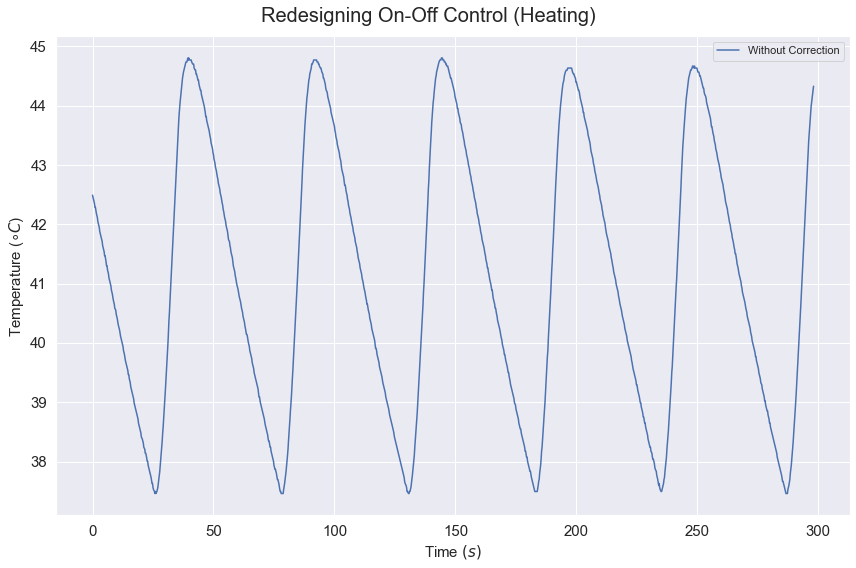

In [14]:
plt.figure(figsize = (12,8))

#Offsetting Data
min_osc= np.min(part2_osc1[:,0])

#Plotting Heat Correction
plt.plot(part2_osc1[:,0] - min_osc, part2_osc1[:,1], label = "Without Correction")

plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Redesigning On-Off Control (Heating)", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.legend()
plt.show()

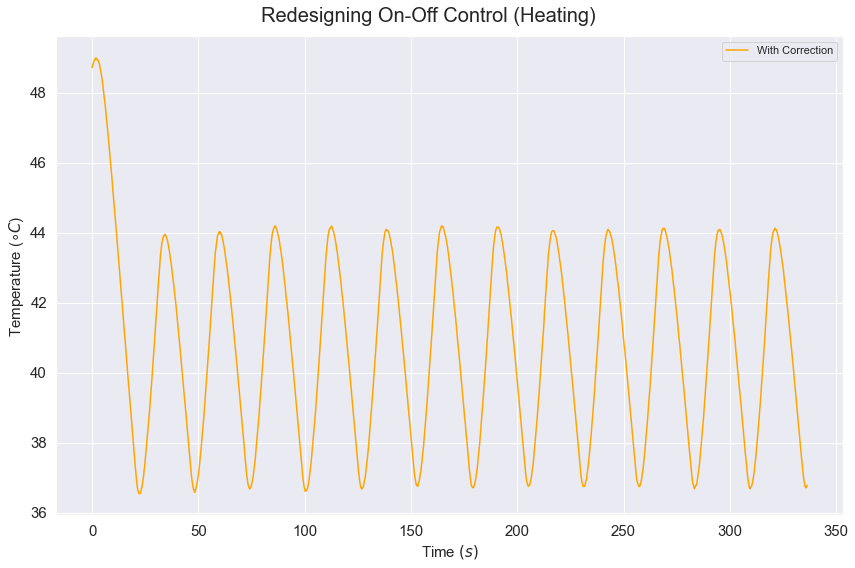

In [15]:
plt.figure(figsize = (12,8))

#Offsetting Data
min_osc= np.min(part2_osc2[:,0])

#Plotting Heat Correction
plt.plot(part2_osc2[:,0] - min_osc, part2_osc2[:,1], color = "orange", label = "With Correction")

plt.xlabel(r"Time $(s)$", size = 15)
plt.ylabel(r"Temperature ($\circ C$)", size = 15)
plt.suptitle("Redesigning On-Off Control (Heating)", size = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.tight_layout()
plt.legend()
plt.show()